In [1]:
import numpy as np
import pandas as pd
import os
os.chdir("/content/drive/MyDrive/BA Thesis/Code_notebooks")
print(os.getcwd())
import utils
import pickle as pkl
import time
import matplotlib.pyplot as plt
import seaborn as sns

/content/drive/MyDrive/BA Thesis/Code_notebooks


In [2]:
test_types = ["cs", "dcf", "regular"]
test_problems = [["BinaryAddition", "BinaryMultiplication", "BucketSort", "ComputeSqrt", "DuplicateString", "MissingDuplicateString", "OddsFirst"],
                ["ModularArithmeticBrackets", "ReverseString", "SolveEquation", "StackManipulation"],
                ["CycleNavigation", "EvenPairs", "ModularArithmetic", "ParityCheck"]]

not_done = []

In [ ]:
for idx, test_type in enumerate(test_types):
  print(test_type + ":")
  c = 0
  for test_problem in ["BinaryMultiplication"]:
    #if test_problem != "StackManipulation":
    #continue
    print(" ")
    print(test_problem + ":")
    path = "/content/drive/MyDrive/BA Thesis/data/training/" + test_type + "/" + test_problem
    os.chdir(path)
    dir = os.listdir()
    if test_problem == "BinaryMultiplication":
      for file in dir:
        with open(file, 'rb') as f:
          batch = pkl.load(f)

          X = np.array(batch["input"])
          y = np.array(batch["output"])

          print("X: ", X)
          print("y: ", y)

        c += 1

      #print("X[0]: ", X[1])
      #print("y[0]: ", y[1])

cs:
 
BinaryMultiplication:
X:  [[[0. 1. 0.]
  [0. 1. 0.]
  [1. 0. 0.]
  ...
  [0. 1. 0.]
  [0. 1. 0.]
  [0. 1. 0.]]

 [[1. 0. 0.]
  [1. 0. 0.]
  [0. 1. 0.]
  ...
  [1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]]

 [[0. 1. 0.]
  [0. 1. 0.]
  [0. 1. 0.]
  ...
  [0. 1. 0.]
  [1. 0. 0.]
  [0. 1. 0.]]

 ...

 [[0. 1. 0.]
  [1. 0. 0.]
  [0. 1. 0.]
  ...
  [1. 0. 0.]
  [0. 1. 0.]
  [0. 1. 0.]]

 [[1. 0. 0.]
  [0. 1. 0.]
  [1. 0. 0.]
  ...
  [1. 0. 0.]
  [0. 1. 0.]
  [1. 0. 0.]]

 [[1. 0. 0.]
  [1. 0. 0.]
  [0. 1. 0.]
  ...
  [0. 1. 0.]
  [1. 0. 0.]
  [0. 1. 0.]]]
y:  [[[0. 1. 0.]
  [1. 0. 0.]
  [0. 1. 0.]
  ...
  [1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]
  ...
  [1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]]

 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 1. 0.]
  ...
  [0. 1. 0.]
  [0. 0. 1.]
  [1. 0. 0.]]

 ...

 [[1. 0. 0.]
  [1. 0. 0.]
  [1. 0. 0.]
  ...
  [1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 1. 0.]
  ...
  [0. 0. 1.]
  [1. 0. 0.]
  [1. 0. 0.]]

 [[1. 

KeyboardInterrupt: 

In [7]:

for idx, test_type in enumerate(test_types):
  print(test_type + ":")
  for test_problem in test_problems[idx]:
    print(" ")
    print(test_problem + ":")
    path = "/content/drive/MyDrive/BA Thesis/models/" + test_type + "/" + test_problem
    matching_files = [f for f in os.listdir(path) if f.startswith("eval_dict_128_2")]
    if len(matching_files) == 0:
      continue
    with open(path + "/" + matching_files[0], 'rb') as f:
      eval_dict = pkl.load(f)
    eval_dict["accuracies"] = eval_dict["accuracies"][~np.isnan(eval_dict["accuracies"])]
    print(np.mean(eval_dict["accuracies"]))

cs:
 
BinaryAddition:
0.9961755850891879
 
BinaryMultiplication:
0.99218747800329
 
BucketSort:
0.9885089770918298
 
ComputeSqrt:
0.9713169278568858
 
DuplicateString:
0.9981128272124423
 
MissingDuplicateString:
0.5019021739130435
 
OddsFirst:
0.9984483587517453
dcf:
 
ModularArithmeticBrackets:
0.2016508152173913
 
ReverseString:
0.9995410343164698
 
SolveEquation:
0.20055027173913045
 
StackManipulation:
0.9930119485168822
regular:
 
CycleNavigation:
0.19816576086956522
 
EvenPairs:
1.0
 
ModularArithmetic:
0.19740604575163398
 
ParityCheck:
0.5043478260869565


In [5]:
# creating plot for xLSTM comparison
col_names = ["Bucket Sort", "Missing Dupicate", "Mod Arithmetic (no Brackets)", "Solve Equation", "Cycle Nav", "Even Pairs", "Mod Arithmetic (with brackets)", "Parity Check"]
row_names = ["Mamba (xLSTM paper)", "Mamba_128_2", "Mamba_256_2", "Mamba_64_2"]

used_results = ["BucketSort", "MissingDuplicate", "ModularArithmeticBrackets", "SolveEquation", "EvenPairs", "ModularArithmetic", "ParityCheck"]

experiments = ["Mamba_128_2", "Mamba_256_2", "Mamba_64_2"]

table = pd.DataFrame(columns=col_names, index=row_names)
table.fillna(0, inplace=True)

table.loc["Mamba (xLSTM paper)"] = [0.69, 0.15, 0.04, 0.05, 0.86, 1.0, 0.05, 0.13]
table.loc["Mamba_128_2"] = [0.99, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00]
table.loc["Mamba_256_2"] = [1.00, 0.00, 0.00, 0.00, 0.00, 0.92, 0.00, 0.00]
table.loc["Mamba_64_2"] = [0.97, 0.00, 0.01, 0.00, 0.00, 1.00, 0.00, 0.01]

table


<ipython-input-5-2b6904359143>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  table.fillna(0, inplace=True)
<ipython-input-5-2b6904359143>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.69' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  table.loc["Mamba (xLSTM paper)"] = [0.69, 0.15, 0.04, 0.05, 0.86, 1.0, 0.05, 0.13]
<ipython-input-5-2b6904359143>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.15' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  table.loc["Mamba (xLSTM paper)"] = [0.69, 0.15, 0.04, 0.05, 0.86, 1.

,Bucket Sort,Missing Dupicate,Mod Arithmetic (no Brackets),Solve Equation,Cycle Nav,Even Pairs,Mod Arithmetic (with brackets),Parity Check
Mamba (xLSTM paper),0.69,0.15,0.04,0.05,0.86,1.00,0.05,0.13
Mamba_128_2,0.99,0.00,0.00,0.00,0.00,1.00,0.00,0.00
Mamba_256_2,1.00,0.00,0.00,0.00,0.00,0.92,0.00,0.00
Mamba_64_2,0.97,0.00,0.01,0.00,0.00,1.00,0.00,0.01


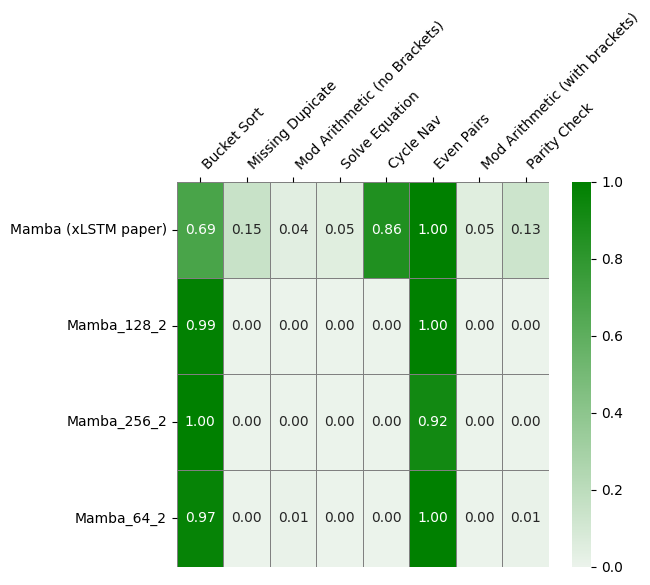

In [6]:
# prompt: Using dataframe table: A heatmap where 0.00 values are colored white while 1.00 values are colored green. The values are written inside the respective pixel



# Create a custom colormap (white for 0, green for 1)
cmap = sns.light_palette("green", as_cmap=True)

# Create the heatmap
plt.figure(figsize=(6, 5))  # Adjust figure size if needed
ax = sns.heatmap(
    table,
    cmap=cmap,
    annot=True,  # Display values inside the heatmap cells
    fmt=".2f",  # Format numbers to 2 decimal places
    linewidths=0.5,  # Optional: add grid lines
    linecolor="gray",  # Grid color
    cbar=True  # Show color bar
)

# Adjust X-axis labels
ax.xaxis.set_ticks_position('top')  # Move x-axis labels to the top
ax.xaxis.set_label_position('top')
plt.xticks(rotation=45, ha='left')  # Rotate labels 45° and align left to prevent overlap

# Show the plot
plt.show()


<ipython-input-14-091349bb1f7b>:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  table.fillna(0, inplace=True)
<ipython-input-14-091349bb1f7b>:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_table = table.applymap(format_value)


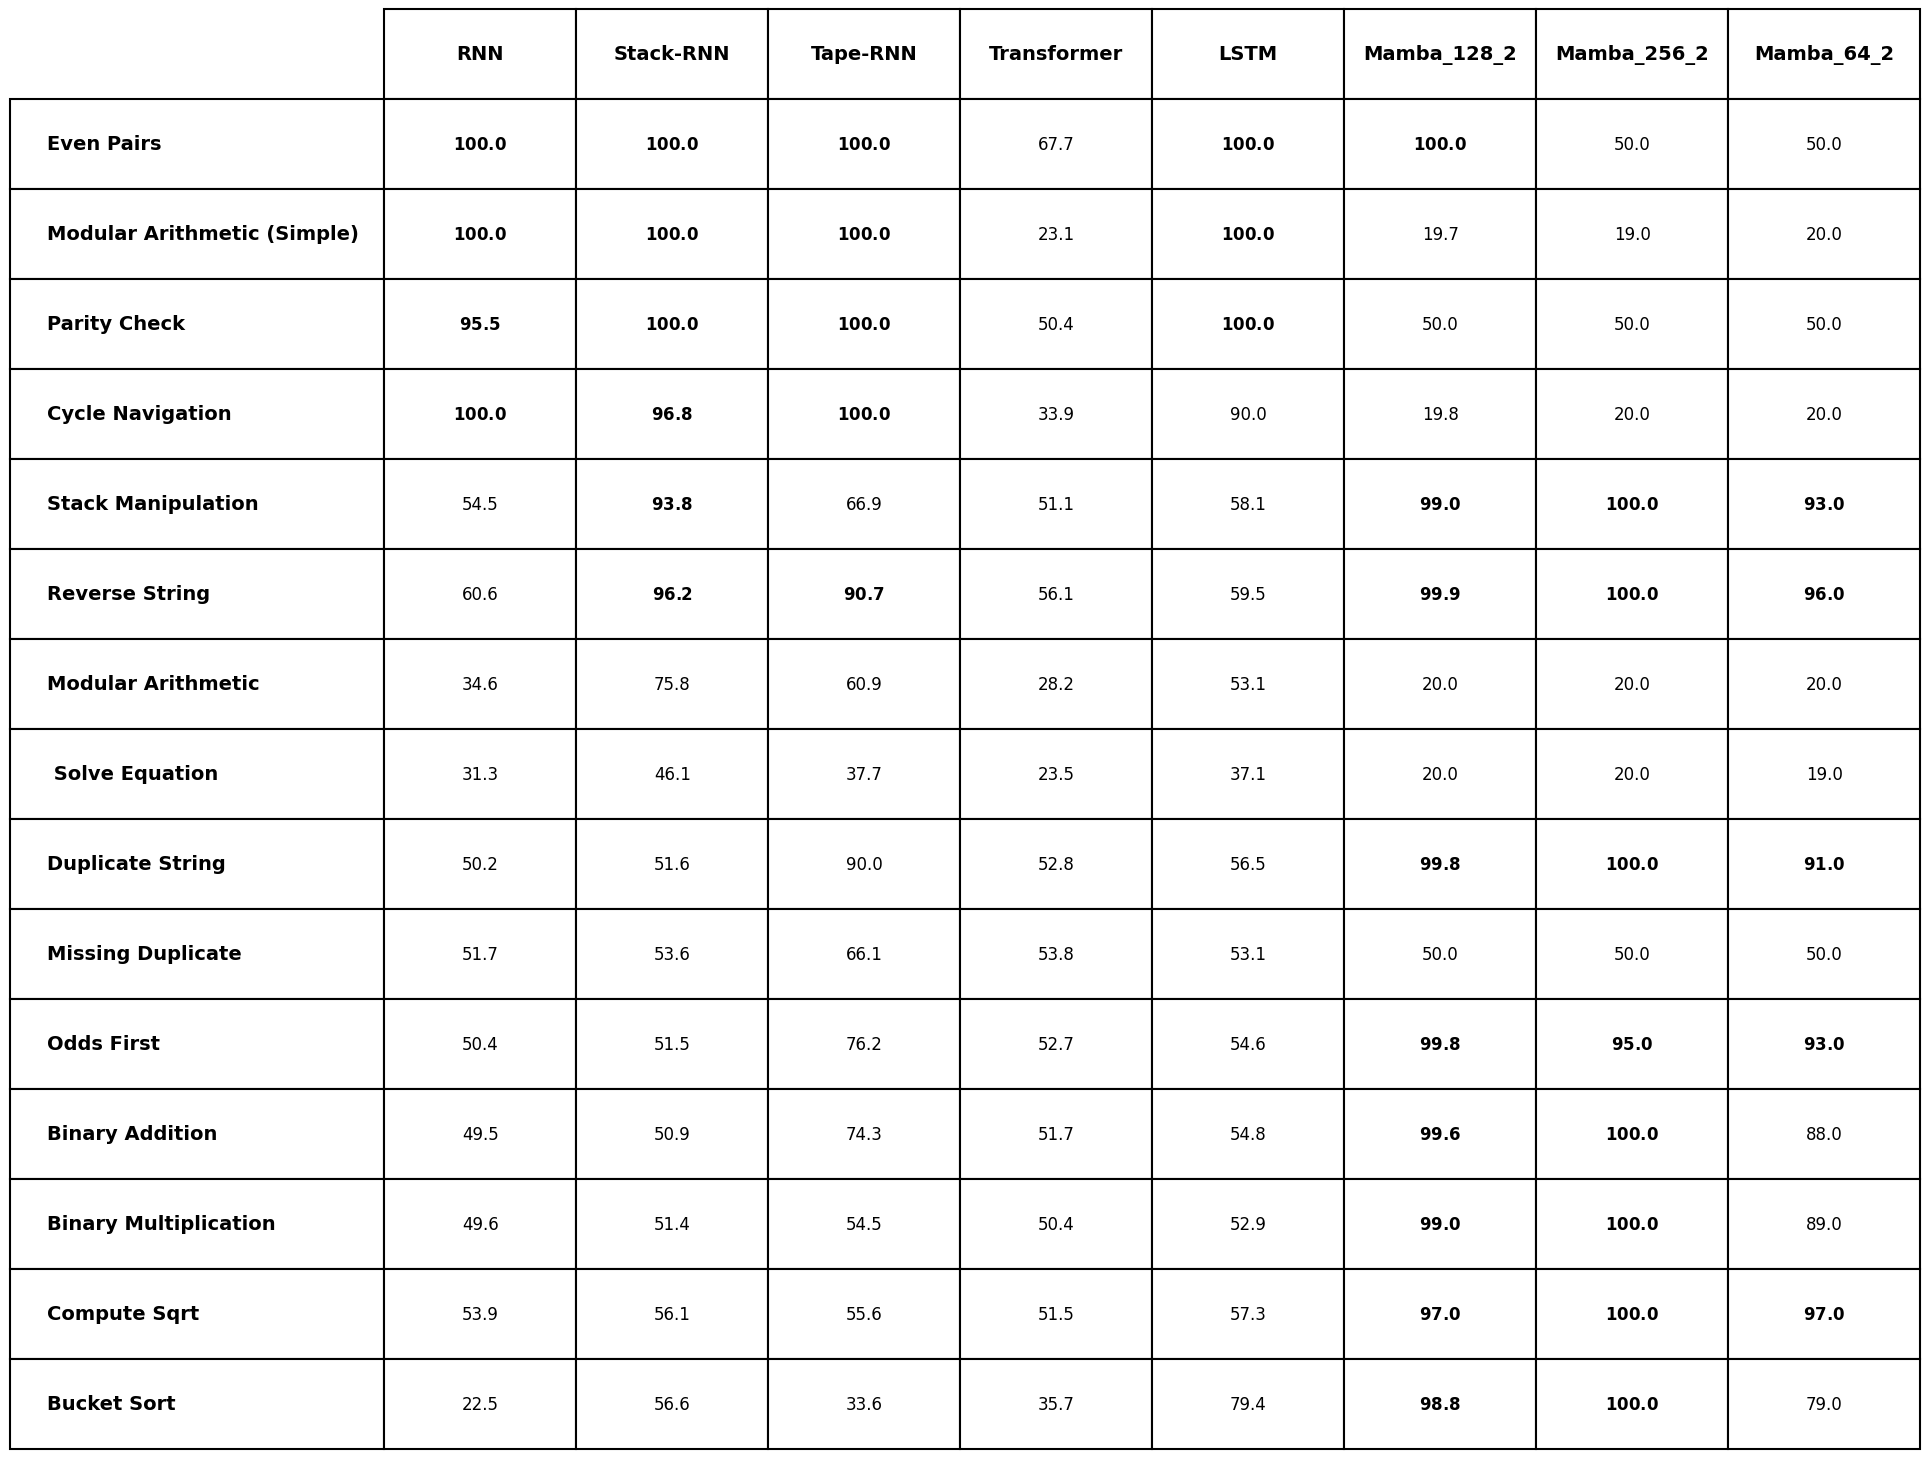

In [ ]:
order_print = ["Even Pairs", "Modular Arithmetic (Simple)", "Parity Check", "Cycle Navigation",
               "Stack Manipulation", "Reverse String", "Modular Arithmetic", " Solve Equation",
               "Duplicate String", "Missing Duplicate", "Odds First", "Binary Addition",
               "Binary Multiplication", "Compute Sqrt", "Bucket Sort"]
order_process = ["EvenPairs", "ModularArithmeticBrackets", "ParityCheck", "CycleNavigation",
                 "StackManipulation", "ReverseString", "ModularArithmetic", "SolveEquation",
                 "DuplicateString", "MissingDuplicateString", "OddsFirst", "BinaryAddition",
                 "BinaryMultiplication", "ComputeSqrt", "BucketSort"]
order_models = ["RNN", "Stack-RNN", "Tape-RNN", "Transformer", "LSTM", "Mamba_128_2", "Mamba_256_2", "Mamba_64_2"]
order_values_64_2 = [100.0, 19.6, 50.5, 20.4, 99.0, 99.3, 19.6, 20.1, 99.8, 49.2, 99.7, 99.6, 99.3, 97.5, 97.8]
order_values_128_2 = [99.6, 19.7, 50.4, 19.8, 99.3, 100.0, 20.2, 20.1, 99.8, 50.1, 99.8, 99.6, 99.2, 97.1, 98.9]
order_values_256_2 = [96.5, 20.2, 50.5, 20.3, 100.0, 100.0, 20.2, 20.2, 99.9, 50.2, 100.0, 100.0, 100.0, 99.2, 99.8]
order_values_RNN = [100.0, 100.0, 95.5, 100.0, 54.5, 60.6, 34.6, 31.3, 50.2, 51.7, 50.4, 49.5, 49.6, 53.9, 22.5]
order_values_Stack_RNN = [100.0, 100.0, 100.0, 96.8, 93.8, 96.2, 75.8, 46.1, 51.6, 53.6, 51.5, 50.9, 51.4, 56.1, 56.6]
order_values_Tape_RNN = [100.0, 100.0, 100.0, 100.0, 66.9, 90.7, 60.9, 37.7, 90.0, 66.1, 76.2, 74.3, 54.5, 55.6, 33.6]
order_values_Transformer = [67.7, 23.1, 50.4, 33.9, 51.1, 56.1, 28.2, 23.5, 52.8, 53.8, 52.7, 51.7, 50.4, 51.5, 35.7]
order_values_LSTM = [100.0, 100.0, 100.0, 90.0, 58.1, 59.5, 53.1, 37.1, 56.5, 53.1, 54.6, 54.8, 52.9, 57.3, 79.4]

table = pd.DataFrame(columns=order_models, index=order_print)
table.fillna(0, inplace=True)
table['RNN'] = order_values_RNN
table['Stack-RNN'] = order_values_Stack_RNN
table['Tape-RNN'] = order_values_Tape_RNN
table['Transformer'] = order_values_Transformer
table['LSTM'] = order_values_LSTM
table['Mamba_128_2'] = order_values_128_2
table['Mamba_256_2'] = order_values_256_2
table['Mamba_64_2'] = order_values_64_2

table

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))  # Increase figure size for more space
ax.axis("off")  # Hide axis

# Format function to make values above 90 bold
def format_value(value):
    return f"$\\bf{{{value}}}$" if value > 90 else str(value)  # LaTeX-style bold text

# Convert DataFrame to formatted strings
formatted_table = table.applymap(format_value)

# Create table
table_display = ax.table(
    cellText=formatted_table.values,
    colLabels=table.columns,
    rowLabels=table.index,
    cellLoc="center",
    loc="center"
)

# Increase font size for better readability
table_display.auto_set_font_size(False)
table_display.set_fontsize(12)

# Adjust row height, column width, and bold formatting
for (i, j), cell in table_display.get_celld().items():
    cell.set_edgecolor("black")  # Add grid lines
    cell.set_linewidth(1.5)  # Make grid lines thicker

    # Bold headers
    if i == 0 or j == -1:
        cell.set_fontsize(14)
        cell.set_text_props(weight="bold")
        cell.set_height(0.5)  # Increase header row height

    # Bold numbers > 90
    if i > 0 and table.iloc[i-1, j] > 90:
        cell.set_text_props(weight="bold")

    # Increase row height and column width
    cell.set_height(0.3)  # Increase row height
    cell.set_width(0.4)   # Increase column width

# Adjust layout to prevent overlap
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # Add padding around table

# Show the table
plt.show()